# 4 Training and Modelling the Data<a id='4_Training_and_Modeling_the_Data'></a>

## 4.1 Contents<a id='4.1_Contents'></a>
* [4 Training and Modelling the Data](#4_Training_and_Modelling_the_Data)
  * [4.1 Contents](#4.1_Contents)
  * [4.2 Imports](#4.2_Imports)
  * [4.3 Load Data](#4.3_Load_Data)
  * [4.4 Create Dummy Variables](#4.4_Create_Dummy_Variables)
  * [4.5 Train/Test Split](#4.5_Train_Test_Split)
  * [4.6 Initial Models](#4.6_Initial_Models)
    * [4.6.1 Logistic Regression](#4.6.1_Logistic_Regression)
        * [4.6.1.1 Train the model on the train split](#4.6.1.1_Train_the_model_on_the_train_split)
        * [4.6.1.2 Make predictions using the model on both train and test splits](#4.6.1.2_Make_predictions_using_the_model_on_both_train_and_test_splits)
        * [4.6.1.3 Assess model performance](#4.6.1.3_Assess_model_performance)
    * [4.6.2 Decision Tree](#4.6.2_Decision_Tree)
        * [4.6.2.1 Train the model on the train split](#4.6.1.1_Train_the_model_on_the_train_split)
        * [4.6.2.2 Make predictions using the model on both train and test splits](#4.6.1.2_Make_predictions_using_the_model_on_both_train_and_test_splits)
        * [4.6.2.3 Assess model performance](#4.6.1.3_Assess_model_performance)
    * [4.8.2 Pipelines](#4.8.2_Pipelines)
      * [4.8.2.1 Define the pipeline](#4.8.2.1_Define_the_pipeline)
      * [4.8.2.2 Fit the pipeline](#4.8.2.2_Fit_the_pipeline)
      * [4.8.2.3 Make predictions on the train and test sets](#4.8.2.3_Make_predictions_on_the_train_and_test_sets)
      * [4.8.2.4 Assess performance](#4.8.2.4_Assess_performance)
  * [4.9 Refining The Decision Tree](#4.9_Refining_The_Decision_Tree)
    * [4.9.1 Define the pipeline](#4.9.1_Define_the_pipeline)
    * [4.9.2 Fit the pipeline](#4.9.2_Fit_the_pipeline)
    * [4.9.3 Assess performance on the train and test set](#4.9.3_Assess_performance_on_the_train_and_test_set)
    * [4.9.4 Define a new pipeline to select a different number of features](#4.9.4_Define_a_new_pipeline_to_select_a_different_number_of_features)
    * [4.9.5 Fit the pipeline](#4.9.5_Fit_the_pipeline)
    * [4.9.6 Assess performance on train and test data](#4.9.6_Assess_performance_on_train_and_test_data)
    * [4.9.7 Assessing performance using cross-validation](#4.9.7_Assessing_performance_using_cross-validation)
    * [4.9.8 Hyperparameter search using GridSearchCV](#4.9.8_Hyperparameter_search_using_GridSearchCV)
  * [4.10 Random Forest Model](#4.10_Random_Forest_Model)
    * [4.10.1 Define the pipeline](#4.10.1_Define_the_pipeline)
    * [4.10.2 Fit and assess performance using cross-validation](#4.10.2_Fit_and_assess_performance_using_cross-validation)
    * [4.10.3 Hyperparameter search using GridSearchCV](#4.10.3_Hyperparameter_search_using_GridSearchCV)
  * [4.11 Final Model Selection](#4.11_Final_Model_Selection)
    * [4.11.1 Linear regression model performance](#4.11.1_Linear_regression_model_performance)
    * [4.11.2 Random forest regression model performance](#4.11.2_Random_forest_regression_model_performance)
    * [4.11.3 Conclusion](#4.11.3_Conclusion)
  * [4.12 Data quantity assessment](#4.12_Data_quantity_assessment)
  * [4.13 Save best model object from pipeline](#4.13_Save_best_model_object_from_pipeline)
  * [4.14 Summary](#4.14_Summary)


## 4.2 Imports<a id='4.2_Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression
import datetime
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
import pydotplus
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from IPython.display import Image  
import pydotplus

## 4.3 Load Data<a id='4.3_Load_Data'></a>

In [2]:
spotify_data = pd.read_csv('../data/genre_music.csv')
spotify_data.head()

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s,time_signature,chorus_hit,sections,popularity,decade,genre
0,Jealous Kind Of Fella,Garland Green,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173.533,3,32.94975,9,1,60s,edm
1,Initials B.B.,Serge Gainsbourg,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213.613,4,48.82510,10,0,60s,pop
2,Melody Twist,Lord Melody,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223.960,4,37.22663,12,0,60s,pop
3,Mi Bomba Sonó,Celia Cruz,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157.907,4,24.75484,8,0,60s,pop
4,Uravu Solla,P. Susheela,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245.600,4,21.79874,14,0,60s,r&b


In [3]:
spotify_data.shape

(41099, 20)

## 4.4 Create Dummy Variables<a id='4.4_Create_Dummy_Variables'></a>

To better utilize the sklearn library, any text variables need to be converted to dummy variables.  Since we are not doing anything with artist or track name, the only dummy varaible we need to convert is decade.  Genre could be created as a dummy variable as well but for ease of analysis, we will leave genre as it exists in the source dataset.

In [4]:
decade_dummy=pd.get_dummies(spotify_data["decade"])
decade_dummy.head()

,00s,10s,60s,70s,80s,90s
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [5]:
# Drop column as it is now encoded
spotify_data = spotify_data.drop(['decade'],axis = 1)
# Join the encoded df
spotify_data_dummies = pd.concat([spotify_data,decade_dummy],axis=1)

In [6]:
spotify_data_dummies.head()

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,chorus_hit,sections,popularity,genre,00s,10s,60s,70s,80s,90s
0,Jealous Kind Of Fella,Garland Green,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,...,32.94975,9,1,edm,0,0,1,0,0,0
1,Initials B.B.,Serge Gainsbourg,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,...,48.82510,10,0,pop,0,0,1,0,0,0
2,Melody Twist,Lord Melody,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,...,37.22663,12,0,pop,0,0,1,0,0,0
3,Mi Bomba Sonó,Celia Cruz,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,...,24.75484,8,0,pop,0,0,1,0,0,0
4,Uravu Solla,P. Susheela,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,...,21.79874,14,0,r&b,0,0,1,0,0,0


With the dummy varaiables created and added to the original dataset, we will now drop the track and artist columns for ease of modelling.

In [7]:
spotify_data_dummies = spotify_data_dummies.drop(['track','artist'],axis = 1)

In [8]:
spotify_data_dummies.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,chorus_hit,sections,popularity,genre,00s,10s,60s,70s,80s,90s
0,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,...,32.94975,9,1,edm,0,0,1,0,0,0
1,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,...,48.82510,10,0,pop,0,0,1,0,0,0
2,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,...,37.22663,12,0,pop,0,0,1,0,0,0
3,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,...,24.75484,8,0,pop,0,0,1,0,0,0
4,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,...,21.79874,14,0,r&b,0,0,1,0,0,0


In [9]:
feature_names = list(spotify_data_dummies.columns[1:])
print("features:", feature_names, sep="\n")

features:
['energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_s', 'time_signature', 'chorus_hit', 'sections', 'popularity', 'genre', '00s', '10s', '60s', '70s', '80s', '90s']


In [10]:
class_names = ['edm', 'latin', 'pop', 'r&b', 'rap', 'rock']
print("classes:", class_names, sep="\n")

classes:
['edm', 'latin', 'pop', 'r&b', 'rap', 'rock']


## 4.5 Train/Test Split<a id='4.5_Train_Test_Split'></a>

In order to get a solid read on the validity of our model, we will need to split our data set into a set to train the model and a set to test the performance of the model.  We will use a 70/30 split where we use 70% of our data to train the model and 30% of the data to test the performance.

In [11]:
len(spotify_data_dummies) * .7, len(spotify_data_dummies) * .3

(28769.3, 12329.699999999999)

In [12]:
spotify_data_dummies.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_s', 'time_signature', 'chorus_hit', 'sections', 'popularity',
       'genre', '00s', '10s', '60s', '70s', '80s', '90s'],
      dtype='object')

In [13]:
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_s', 'time_signature', 'chorus_hit', 'sections', 'popularity',
       '00s', '10s', '60s', '70s', '80s', '90s']

X = spotify_data_dummies[features]

y = spotify_data_dummies['genre']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

In [15]:
X_train.shape, X_test.shape

((28769, 22), (12330, 22))

In [16]:
y_train.shape, y_test.shape

((28769,), (12330,))

In [17]:
y_train.value_counts()

pop      11548
r&b       7701
rock      4808
latin     1981
rap       1655
edm       1076
Name: genre, dtype: int64

## 4.6 Initial Model<a id='4.6_Initial_Model'></a>

### 4.6.1 Logistic Regression<a id='4.6.1_Logistic_Regression'></a>

During the exploratory data analysis, the data appeared to best suited for a Decision Tree model but before we run our data against this model, we will see what the data looks like while running a more straight forward logistic regression.  If we find that the logistic regression is better suited to the data set, we may want to scale the data to increase the performance.  But as the data is rather solid in it's raw form, we may find the raw form is suitable for the Decision Tree Classifier.

#### 4.6.1.1 Train the model on the train split<a id='4.6.1.1_Train_the_model_on_the_train_split'></a>

In [18]:
clf = LogisticRegression()

clf.fit(X_train, y_train)

C:\Users\ashle\Anaconda3\envs\sb\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

The logistic regression model does not appear to align well with our data set as we can see with the error message above.  Once the evaluation of the model and compare with the performance of the Decision Tree Classifier.

#### 4.6.1.2 Make predictions using the model on both train and test splits<a id='4.6.1.2_Make_predictions_using_the_model_on_both_train_and_test_splits'></a>

In [19]:
y_predict_training = clf.predict(X_train)
y_predict_testing = clf.predict(X_test)

#### 4.6.1.3 Assess model performance<a id='4.6.1.3_Assess_model_performance'></a>

In [20]:
print("\n")
print("[Training] Accuracy score: (y_train, y_predict_training)",accuracy_score(y_train, y_predict_training))

# Print the accuracy from the testing data.
y_predict_test = clf.predict(X_test)
print("\n")
print("[Test] Accuracy score (y_predict_test, y_test):",accuracy_score(y_test, y_predict_test))





[Training] Accuracy score: (y_train, y_predict_training) 0.5965448920713268


[Test] Accuracy score (y_predict_test, y_test): 0.5985401459854015


The first look at a logistic regression shows an accuracy of just shy of 60%.  Depending on the outcome of the decision tree classifier, we may want to revisit this model and perhaps try it again with a scaled dataset.

### 4.6.2 Decision Tree<a id='4.6.2_Decision_Tree'></a>

#### 4.6.2.1 Train the model on the train split<a id='4.6.2.1_Train_the_model_on_the_train_split'></a>

In [21]:
dtree1 = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)

dtree1 = dtree1.fit(X_train, y_train)

dtree1_train_text = export_text(dtree1)
print(dtree1_train_text)

|--- feature_11 <= 239.97
|   |--- feature_0 <= 0.36
|   |   |--- feature_5 <= 0.22
|   |   |   |--- class: rock
|   |   |--- feature_5 >  0.22
|   |   |   |--- class: rap
|   |--- feature_0 >  0.36
|   |   |--- feature_1 <= 0.85
|   |   |   |--- feature_5 <= 0.22
|   |   |   |   |--- class: pop
|   |   |   |--- feature_5 >  0.22
|   |   |   |   |--- class: rap
|   |   |--- feature_1 >  0.85
|   |   |   |--- feature_10 <= 170.00
|   |   |   |   |--- class: latin
|   |   |   |--- feature_10 >  170.00
|   |   |   |   |--- class: edm
|--- feature_11 >  239.97
|   |--- feature_0 <= 0.36
|   |   |--- feature_5 <= 0.22
|   |   |   |--- class: rock
|   |   |--- feature_5 >  0.22
|   |   |   |--- class: rap
|   |--- feature_0 >  0.36
|   |   |--- feature_5 <= 0.22
|   |   |   |--- feature_10 <= 170.00
|   |   |   |   |--- class: r&b
|   |   |   |--- feature_10 >  170.00
|   |   |   |   |--- class: edm
|   |   |--- feature_5 >  0.22
|   |   |   |--- class: rap



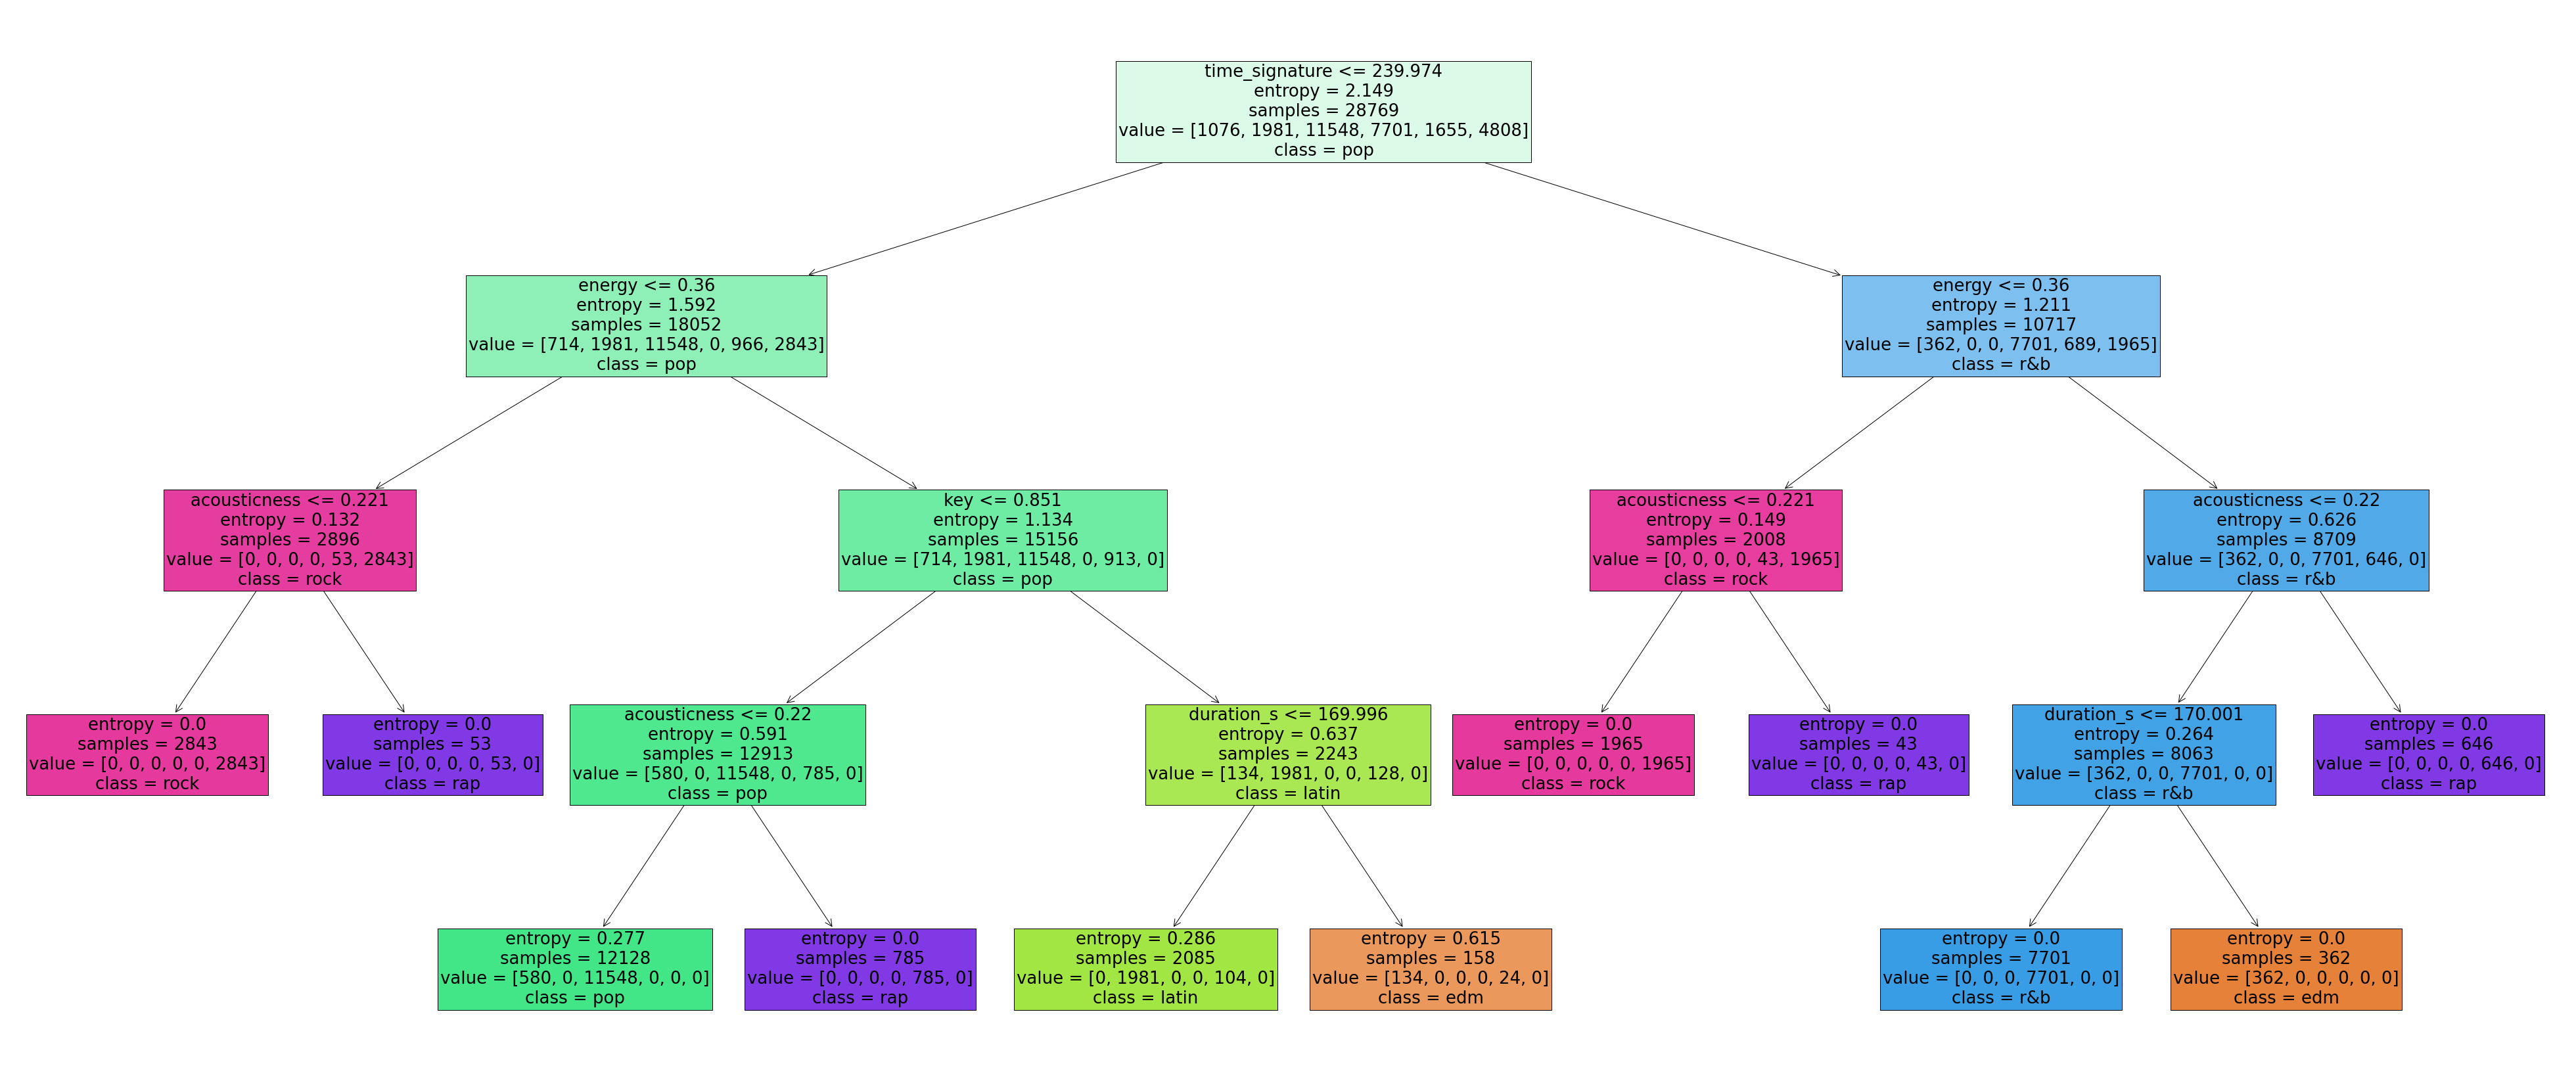

In [22]:
dtree1_train_fig = plt.figure(figsize=(70,30))
dtree1_train_plot = tree.plot_tree(dtree1, 
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True,
                  fontsize=26)

#### 4.6.2.2 Make predictions using the model on both train and test splits<a id='4.6.2.2_Make_predictions_using_the_model_on_both_train_and_test_splits'></a>
        

In [23]:
dtree1_train_pred = dtree1.predict(X_train)

dtree1_test_pred = dtree1.predict(X_test)

In [24]:
dtree1_train_pred = pd.Series(dtree1_train_pred)

dtree1

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Commentary TBD

#### 4.6.2.3 Assess model performance<a id='4.6.2.3_Assess_model_performance'></a>

##### Training Set

In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_train, dtree1_train_pred,labels=None,target_names=class_names,sample_weight=None, digits=2, output_dict=False, zero_division='warn'))

              precision    recall  f1-score   support

         edm       0.95      0.46      0.62      1076
       latin       0.95      1.00      0.97      1981
         pop       0.95      1.00      0.98     11548
         r&b       1.00      1.00      1.00      7701
         rap       1.00      0.92      0.96      1655
        rock       1.00      1.00      1.00      4808

    accuracy                           0.98     28769
   macro avg       0.98      0.90      0.92     28769
weighted avg       0.98      0.98      0.97     28769



##### Test Set

In [26]:
print(classification_report(y_test, dtree1_test_pred,labels=None,target_names=class_names,sample_weight=None, digits=2, output_dict=False, zero_division='warn'))

              precision    recall  f1-score   support

         edm       0.96      0.48      0.64       439
       latin       0.95      1.00      0.97       889
         pop       0.96      1.00      0.98      4912
         r&b       1.00      1.00      1.00      3339
         rap       1.00      0.92      0.96       709
        rock       1.00      1.00      1.00      2042

    accuracy                           0.98     12330
   macro avg       0.98      0.90      0.92     12330
weighted avg       0.98      0.98      0.97     12330

